<a href="https://colab.research.google.com/github/fahdleroi/basic-machine-learning-algorithms/blob/main/sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **importation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons # ne sont pas linearement separable
from sklearn.datasets import make_blobs #linearment separable

# **Dataset**

Non Linéairement Séparable

In [2]:
nb_obs=100
nb_cara=2
x,y=make_moons(n_samples=nb_obs,noise=0.1)
y=y.reshape(y.shape[0],1)

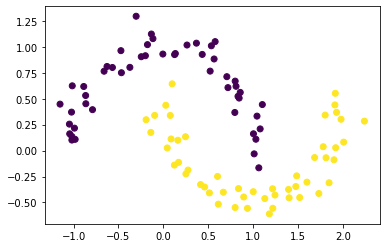

In [3]:
plt.scatter(x[:,0],x[:,1], c=y)

In [4]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

Linéairement Séparable

In [5]:
x_,y_=make_blobs(n_samples=100,n_features=2,centers=4)
y_=y_.reshape(y_.shape[0],1)
np.shape(x_)

(100, 2)

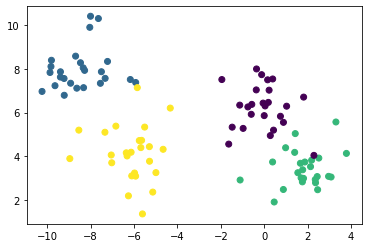

In [6]:
plt.scatter(x_[:,0],x_[:,1], c=y_)

In [7]:
from sklearn.model_selection import train_test_split 
x__train, x__test, y__train, y__test=train_test_split(x_,y_,test_size=0.3)
print(y__test)

[[1]
 [0]
 [0]
 [3]
 [1]
 [1]
 [0]
 [1]
 [2]
 [1]
 [1]
 [3]
 [2]
 [1]
 [1]
 [0]
 [3]
 [3]
 [3]
 [0]
 [2]
 [0]
 [0]
 [3]
 [3]
 [1]
 [0]
 [2]
 [0]
 [1]]


In [8]:
#Encodage des donnees
from keras.utils import np_utils
y__train=np_utils.to_categorical(y__train,4) 
y__test=np_utils.to_categorical(y__test,4)
print(y__test,np.shape(y__test))

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]] (30, 4)


# **Model**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
def NAN1(x_dim):
   model=Sequential()
   #architecture
   model.add(Dense(3,activation="sigmoid", input_dim=x_dim)) #Ajouter une cache cauché composée de 3 neurones
   model.add(Dense(1,activation="sigmoid")) # Une seule variable de prédiction
   return model

In [14]:
def NAN2(x_dim):
   model=Sequential()
   #architecture
   model.add(Dense(64,activation="relu", input_dim=x_dim)) #Ajouter une cache cauché composée de 64 neurones
   model.add(Dense(32,activation="relu")) #Ajouter une cache cauché composée de 32 neurones
   model.add(Dense(4,activation="softmax")) # 4 variable de prédiction
   return model

In [15]:
model1=NAN1(2)
model2=NAN2(2)
model1.compile(loss = "binary_crossentropy", optimizer ='sgd',metrics = ["accuracy"]) #compilation - algorithme d'apprentissage
model2.compile(loss = "categorical_crossentropy", optimizer ='adam',metrics = ["accuracy"])

In [16]:
model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=400,batch_size=10)

Epoch 1/400
7/7 [==============================] - 1s 56ms/step - loss: 0.6866 - accuracy: 0.5325 - val_loss: 0.6985 - val_accuracy: 0.4667
Epoch 2/400
7/7 [==============================] - 0s 7ms/step - loss: 0.6983 - accuracy: 0.4686 - val_loss: 0.6970 - val_accuracy: 0.4667
Epoch 3/400
7/7 [==============================] - 0s 7ms/step - loss: 0.6805 - accuracy: 0.5340 - val_loss: 0.6956 - val_accuracy: 0.4667
Epoch 4/400
7/7 [==============================] - 0s 7ms/step - loss: 0.6907 - accuracy: 0.4907 - val_loss: 0.6943 - val_accuracy: 0.4667
Epoch 5/400
7/7 [==============================] - 0s 7ms/step - loss: 0.6852 - accuracy: 0.5086 - val_loss: 0.6930 - val_accuracy: 0.4667
Epoch 6/400
7/7 [==============================] - 0s 7ms/step - loss: 0.6883 - accuracy: 0.4827 - val_loss: 0.6918 - val_accuracy: 0.4667
Epoch 7/400
7/7 [==============================] - 0s 7ms/step - loss: 0.6795 - accuracy: 0.5113 - val_loss: 0.6905 - val_accuracy: 0.4667
Epoch 8/400
7/7 [=========

In [17]:
score = model1.evaluate(x_test,y_test)
print(score)

1/1 [==============================] - 0s 100ms/step - loss: 0.5778 - accuracy: 0.6000
[0.5778036713600159, 0.6000000238418579]
